In [1]:
import os, sys
import uproot, awkward
import ROOT as rt
import numpy as np
from array import array
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pandas as pd

Welcome to JupyROOT 6.26/02


In [2]:
save_dir = "with_shield"
events_in_this_sim = 0.5e6

In [3]:
dir_ = '/Users/shubhampandey/work/geant4/k100sim_anthony/sim_files'
if(save_dir == "no_shield"):
    inFile_k100 = '%s/sim_500k_events_no_shield.root'%(dir_)
elif(save_dir == "with_shield"):
    inFile_k100 = '%s/sim_500k_events_boron_shield_1inch_v1.root'%(dir_)
else:
    print("Incorrect option")

file_k100 = uproot.open(inFile_k100)
if(not file_k100):
    print("could not open file: %s"%(inFile_k100))
    sys.exit(0)
    
tree_k100 = file_k100["simtree"]

if(not tree_k100):
    print("simtree does not exist in file: %s"%(file_k100))
    sys.exit(0)

EV = tree_k100["EV"].array(library="np")
EV = EV - 1
Type = tree_k100["Type"].array(library="np")
E1 = tree_k100["E1"].array(library="np")
D3 = tree_k100["D3"].array(library="np")
DT = tree_k100["DT"].array(library="np")
nCap = tree_k100["nCap"].array(library="np")
time1 = tree_k100["time1"].array(library="np")

k100 = pd.DataFrame( {'EV' : EV,
                  'Type' : Type,
                  'E1' : E1,
                  'D3' : D3,
                      'DT' : DT,
                     'nCap' : nCap,
                     'time1' : time1}
                 )
k100['Edep'] = k100.D3.map(sum)
k100['flag'] = k100.nCap.map(sum).astype(bool)
k100.head(5)

,EV,Type,E1,D3,DT,nCap,time1,Edep,flag
0,323,[-12],[0.5110124],[0.0],[2020],[0],[9.368899e+21],0.000000,False
1,447,"[22, 22, 22, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[0.49732816, 0.3512036, 0.1496337, 3.9e-05, 1....","[0.0, 0.0, 0.00026759, 3.9e-05, 1.802e-05, 2.7...","[1001, 1001, 1001, 1001, 1001, 1001, 1001, 100...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[10000.18, 10000.232, 10001.538, 10001.538, 10...",0.295758,False
2,489,"[22, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[0.22274192, 1.624e-05, 2.94e-05, 2.826e-05, 2...","[0.00049451, 1.624e-05, 2.94e-05, 2.826e-05, 2...","[2008, 2008, 2008, 2008, 2008, 2008, 2008, 200...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[633620.0, 633620.0, 633620.0, 633620.0, 63362...",0.222742,False
3,688,"[22, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[0.065606065, 3.786e-05, 3.964e-05, 3.786e-05,...","[0.00022692, 3.786e-05, 3.964e-05, 3.786e-05, ...","[1002, 1002, 1002, 1002, 1002, 1002, 1002, 100...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[167226.11, 167226.11, 167226.11, 167226.11, 1...",0.065606,False
4,864,"[-12, -12, -12, -12, -12, -12, -12, -12, -12]","[0.6425657, 0.6425657, 0.6425657, 0.6425657, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[3.6183456e+21, 3.6183456e+21, 3.6183456e+21, ...",0.000000,False


In [4]:
def tile_energy(df_):
    #a = (np.dstack((df_.DT,df_.D3)))[0]
    a = (np.dstack((df_.DT,df_.D3,df_.time1)))[0]
    #print (a)
    temp = {}
    for i in a:
        if(i[2] > 1.e11):
            continue
        if(i[0] in temp):
            temp[i[0]] += i[1]
        else:
            temp[i[0]] = i[1]
    #print (temp)
    return np.array([temp[i] for i in temp.keys()])

In [5]:
k100['tile_energy'] = k100.apply(tile_energy,axis=1)

In [6]:
k100

,EV,Type,E1,D3,DT,nCap,time1,Edep,flag,tile_energy
0,323,[-12],[0.5110124],[0.0],[2020],[0],[9.368899e+21],0.000000,False,[]
1,447,"[22, 22, 22, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[0.49732816, 0.3512036, 0.1496337, 3.9e-05, 1....","[0.0, 0.0, 0.00026759, 3.9e-05, 1.802e-05, 2.7...","[1001, 1001, 1001, 1001, 1001, 1001, 1001, 100...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[10000.18, 10000.232, 10001.538, 10001.538, 10...",0.295758,False,[0.2957582610506506]
2,489,"[22, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[0.22274192, 1.624e-05, 2.94e-05, 2.826e-05, 2...","[0.00049451, 1.624e-05, 2.94e-05, 2.826e-05, 2...","[2008, 2008, 2008, 2008, 2008, 2008, 2008, 200...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[633620.0, 633620.0, 633620.0, 633620.0, 63362...",0.222742,False,[0.22274192248369218]
3,688,"[22, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[0.065606065, 3.786e-05, 3.964e-05, 3.786e-05,...","[0.00022692, 3.786e-05, 3.964e-05, 3.786e-05, ...","[1002, 1002, 1002, 1002, 1002, 1002, 1002, 100...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[167226.11, 167226.11, 167226.11, 167226.11, 1...",0.065606,False,[0.0656060671844898]
4,864,"[-12, -12, -12, -12, -12, -12, -12, -12, -12]","[0.6425657, 0.6425657, 0.6425657, 0.6425657, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[3.6183456e+21, 3.6183456e+21, 3.6183456e+21, ...",0.000000,False,[]
...,...,...,...,...,...,...,...,...,...,...
3190,498946,"[22, 22, 11, 11]","[1.3010968, 0.23072675, 1.07037, 0.3372151]","[0.0, 0.0, 0.7331549, 0.3372151]","[2015, 2015, 2015, 2015]","[0, 0, 0, 0]","[34.872875, 34.90053, 34.873966, 34.8742]",1.070370,False,[1.0703699886798859]
3191,498958,"[2112, 2112, 2112, 23011, 23011]","[0.022419604, 0.020846661, 0.015523519, 0.0015...","[0.0, 0.0, 0.0, 0.0015733772, 0.0]","[2020, 2020, 2020, 2020, 2020]","[0, 0, 0, 0, 0]","[392.72617, 396.4292, 469.96658, 392.72617, 39...",0.001573,False,[0.0015733771724626422]
3192,499437,"[22, 22, 22, 22, 11, 11, 11, 11, 11, 11, 11, 1...","[0.2194306, 0.21715268, 0.21169226, 0.11660172...","[0.0, 0.0, 0.0, 0.00018787, 2.762e-05, 1.802e-...","[2012, 2012, 2012, 2012, 2012, 2012, 2012, 201...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1068175.6, 1068175.8, 1068175.8, 1068175.8, 1...",0.219431,False,[0.219430591483615]
3193,499699,[2112],[5.4599354e-08],[0.0],[2005],[0],[1348250.5],0.000000,False,[0.0]


In [7]:
if(save_dir=="no_shield"):
    inFile_nsc = '%s/Nsc_k100_500k_events_no_shield.root'%(dir_)
elif(save_dir=="with_shield"):
    inFile_nsc = '%s/Nsc_k100_500k_events_boron_shield_1inch_v1.root'%(dir_)
else:
    print("Incorrect directory")

file_nsc = uproot.open(inFile_nsc)
if(not file_nsc):
    print("could not open file: %s"%(inFile_nsc))
    sys.exit(0)
else:
    print("Loaded file: %s"%(inFile_nsc))
tree_nsc = file_nsc["nCapInfo"]

if(not tree_nsc):
    print("nCapInfo does not exist in file: %s"%(file_nsc))
    sys.exit(0)

Loaded file: /Users/shubhampandey/work/geant4/k100sim_anthony/sim_files/Nsc_k100_500k_events_boron_shield_1inch_v1.root


In [8]:
ev = tree_nsc["fEvent"].array(library="np")
neutron = tree_nsc["fNeutron_energy"].array(library="np")
pdg = tree_nsc["fPDGID"].array(library="np")
sec_KE = tree_nsc["fsec_KE"].array(library="np")

df = pd.DataFrame( {'fEvent' : ev,
                  'fNeutron_energy' : neutron,
                  'fPDGID' : pdg,
                  'fsec_KE' : sec_KE}
                 )
df.head(10)

,fEvent,fNeutron_energy,fPDGID,fsec_KE
0,0,1.459830e-08,22,7.631125
1,0,1.459830e-08,11,0.007312
2,0,1.459830e-08,260570,0.000543
3,1,5.765503e-08,22,7.631127
4,1,5.765503e-08,11,0.007301
5,1,5.765503e-08,260570,0.000551
6,2,1.478395e-08,22,6.110989
7,2,1.478395e-08,22,0.517069
8,2,1.478395e-08,22,0.786380
9,2,1.478395e-08,22,1.164673


In [9]:
df1 = df[(df.fPDGID != 22) & (df.fPDGID != 11)]

In [10]:
#df[(df.fPDGID != 22) & (df.fPDGID != 11) & (df['fEvent'].isin(k100.EV))]
common_events = df[df['fEvent'].isin(k100.EV) & (df.fPDGID > 1000) ].fEvent
#k100[k100['EV'].isin(common_events)]
k100['common'] = k100['EV'].isin(common_events)

In [11]:
k100.head()

,EV,Type,E1,D3,DT,nCap,time1,Edep,flag,tile_energy,common
0,323,[-12],[0.5110124],[0.0],[2020],[0],[9.368899e+21],0.000000,False,[],True
1,447,"[22, 22, 22, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[0.49732816, 0.3512036, 0.1496337, 3.9e-05, 1....","[0.0, 0.0, 0.00026759, 3.9e-05, 1.802e-05, 2.7...","[1001, 1001, 1001, 1001, 1001, 1001, 1001, 100...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[10000.18, 10000.232, 10001.538, 10001.538, 10...",0.295758,False,[0.2957582610506506],True
2,489,"[22, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[0.22274192, 1.624e-05, 2.94e-05, 2.826e-05, 2...","[0.00049451, 1.624e-05, 2.94e-05, 2.826e-05, 2...","[2008, 2008, 2008, 2008, 2008, 2008, 2008, 200...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[633620.0, 633620.0, 633620.0, 633620.0, 63362...",0.222742,False,[0.22274192248369218],True
3,688,"[22, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[0.065606065, 3.786e-05, 3.964e-05, 3.786e-05,...","[0.00022692, 3.786e-05, 3.964e-05, 3.786e-05, ...","[1002, 1002, 1002, 1002, 1002, 1002, 1002, 100...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[167226.11, 167226.11, 167226.11, 167226.11, 1...",0.065606,False,[0.0656060671844898],True
4,864,"[-12, -12, -12, -12, -12, -12, -12, -12, -12]","[0.6425657, 0.6425657, 0.6425657, 0.6425657, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[3.6183456e+21, 3.6183456e+21, 3.6183456e+21, ...",0.000000,False,[],True


In [12]:
ncapType = []
for i in range(len(k100)):
    if(~k100.common.iloc[i]):
        ncapType.append(0)
        continue
    ncapType.append((df1[df1.fEvent == k100.EV.iloc[i]].fPDGID).iloc[0])

In [13]:
k100['nCapType'] = ncapType

In [14]:
k100[k100.nCapType == 531280].nCapType.count()

108

In [15]:
count = 0
for i in range(len(k100)):
    if(len(k100.nCap.iloc[i]) != len(k100.DT.iloc[i])):
        print('lengths are not equal for event = ',i)
        break
    for j in range(len(k100.nCap.iloc[i])):
        if((k100.nCap.iloc[i])[j] == 1 and (k100.DT.iloc[i])[j] != 1):
            count += 1
            print(k100.iloc[i].nCapType)
print('nCap in NaI  = ',count)

531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
110240
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
0
531280
531280
531280
531280
110240
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
110240
531280
110240
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
531280
nCap in NaI  =  113


# 21.8 sec ~ 50 M events

# 1 sec livetime ~ 2.29e6 events

# 1 event ~ 4.36e-07 secs

In [16]:
np.sqrt(4)

2.0

In [21]:
def calculate_trigger(pid):
    
    triggered_events = 0
    thresholds = [i for i in np.arange(3,14.2,0.2)]
    triggered_list = {}
    trig_event_list = np.zeros(56)
    skipped_events = 0
    for threshold in thresholds:
        triggered_list['%0.1f'%(threshold)] = 0



    for i in range(len(k100)):

        if(k100.iloc[i].nCapType == pid):
            skipped_events += 1
            continue
        temp_trigger = np.zeros(56)
        temp_veto = np.zeros(56)
        for energy in k100.tile_energy.iloc[i]:
            veto = False
            trigger = False

            for j,threshold in enumerate(thresholds):
                if(energy > threshold):
                    temp_veto[j] = True
                elif(energy > 3.0):
                    temp_trigger[j] = True

        for j in range(56):
            if(not temp_veto[j] and temp_trigger[j]):
                triggered_list['%0.1f'%(thresholds[j])] += 1
            #triggered_events += 1
    #         print('%d : %f'%(i,energy))
    #         break

#     print('Total trigger events = %d'%(triggered_list['3.0']))
#     print('Total trigger rate = %f Hz'%(triggered_list['3.0']/0.218))
    print('Skipped events = ',skipped_events)
    livetime = (events_in_this_sim - skipped_events) * (21.8/50e6)
    print ('Full livetime = %0.4f sec'%(events_in_this_sim*((21.8/50e6))))
    print ('After removal livetime = %0.4f sec'%(livetime))
    x = np.zeros(56)
    y = np.zeros(56)
    erry = np.zeros(56)
    for i,j in enumerate(triggered_list.keys()):
        x[i] = float(j)
        y[i] = (triggered_list[j])/livetime
        erry[i] = np.sqrt(triggered_list[j])/livetime
    return np.c_[np.c_[x,y],erry]

In [22]:
trigger_rate_sansFe56 = calculate_trigger(260570)
trigger_rate_sansFe56

Skipped events =  124
Full livetime = 0.2180 sec
After removal livetime = 0.2179 sec


array([[  3.        ,   0.        ,   0.        ],
       [  3.2       ,  55.05952632,  15.89431617],
       [  3.4       ,  87.17758334,  19.99990926],
       [  3.6       , 110.11905264,  22.47795749],
       [  3.8       , 114.7073465 ,  22.9414693 ],
       [  4.        , 133.06052195,  24.70871862],
       [  4.2       , 156.00199125,  26.75412078],
       [  4.4       , 169.76687283,  27.90950197],
       [  4.6       , 192.70834213,  29.73554276],
       [  4.8       , 201.88492985,  30.43529832],
       [  5.        , 211.06151757,  31.11932302],
       [  5.2       , 234.00298687,  32.76697221],
       [  5.4       , 270.70933775,  35.24335387],
       [  5.6       , 293.65080705,  36.70635088],
       [  5.8       , 334.94545179,  39.20239993],
       [  6.        , 385.41668426,  42.05240785],
       [  6.2       , 422.12303514,  44.00936867],
       [  6.4       , 477.18256146,  46.79159985],
       [  6.6       , 513.88891234,  48.55793798],
       [  6.8       , 518.47720

In [23]:
trigger_rate_sansI127 = calculate_trigger(531280)
trigger_rate_sansI127

Skipped events =  108
Full livetime = 0.2180 sec
After removal livetime = 0.2180 sec


array([[  3.        ,   0.        ,   0.        ],
       [  3.2       ,  55.05776404,  15.89380744],
       [  3.4       ,  87.17479306,  19.99926912],
       [  3.6       , 110.11552807,  22.47723804],
       [  3.8       , 119.29182208,  23.3950511 ],
       [  4.        , 133.05626309,  24.70792777],
       [  4.2       , 160.58514511,  27.14384373],
       [  4.4       , 174.34958612,  28.28323763],
       [  4.6       , 188.11402713,  29.37847528],
       [  4.8       , 197.29032113,  30.08649191],
       [  5.        , 211.05476214,  31.11832699],
       [  5.2       , 224.81920315,  32.11702902],
       [  5.4       , 256.93623217,  34.33454825],
       [  5.6       , 266.11252618,  34.94228655],
       [  5.8       , 279.87696719,  35.83457364],
       [  6.        , 302.8177022 ,  37.27428246],
       [  6.2       , 321.17029021,  38.38719193],
       [  6.4       , 339.52287823,  39.46873289],
       [  6.6       , 362.46361324,  40.78034258],
       [  6.8       , 362.46361

In [24]:
trigger_rate_sansCl35 = calculate_trigger(170360)
trigger_rate_sansCl35

Skipped events =  334
Full livetime = 0.2180 sec
After removal livetime = 0.2179 sec


array([[  3.        ,   0.        ,   0.        ],
       [  3.2       ,  50.49244455,  15.22404485],
       [  3.4       ,  73.44355571,  18.36088893],
       [  3.6       , 100.9848891 ,  21.5300507 ],
       [  3.8       , 110.16533356,  22.48740455],
       [  4.        , 123.93600026,  23.85149437],
       [  4.2       , 151.47733365,  26.36881917],
       [  4.4       , 169.83822257,  27.9212318 ],
       [  4.6       , 188.1991115 ,  29.39176323],
       [  4.8       , 188.1991115 ,  29.39176323],
       [  5.        , 197.37955597,  30.1001001 ],
       [  5.2       , 224.92088936,  32.13155562],
       [  5.4       , 243.28177828,  33.41732226],
       [  5.6       , 266.23288944,  34.95809102],
       [  5.8       , 298.36444506,  37.00755475],
       [  6.        , 339.67644515,  39.48658469],
       [  6.2       , 376.398223  ,  41.56623018],
       [  6.4       , 436.07111202,  44.73995209],
       [  6.6       , 468.20266764,  46.3589721 ],
       [  6.8       , 472.79288

In [25]:
trigger_rate_inclusive = calculate_trigger(-1)
trigger_rate_inclusive

Skipped events =  0
Full livetime = 0.2180 sec
After removal livetime = 0.2180 sec


array([[  3.        ,   0.        ,   0.        ],
       [  3.2       ,  59.63302752,  16.53922603],
       [  3.4       ,  91.74311927,  20.51438511],
       [  3.6       , 119.26605505,  23.38999777],
       [  3.8       , 128.44036697,  24.27294781],
       [  4.        , 146.78899083,  25.9488727 ],
       [  4.2       , 174.31192661,  28.27712845],
       [  4.4       , 192.66055046,  29.72816834],
       [  4.6       , 215.59633028,  31.44795688],
       [  4.8       , 224.7706422 ,  32.11009174],
       [  5.        , 238.53211009,  33.07845207],
       [  5.2       , 266.05504587,  34.93473902],
       [  5.4       , 307.33944954,  37.54748978],
       [  5.6       , 330.27522936,  38.92330906],
       [  5.8       , 371.55963303,  41.28440367],
       [  6.        , 422.01834862,  43.99845434],
       [  6.2       , 463.30275229,  46.10034689],
       [  6.4       , 522.93577982,  48.97742317],
       [  6.6       , 564.22018349,  50.87402067],
       [  6.8       , 568.80733

In [26]:
data_txt = '/Users/shubhampandey/work/plotting/trigger_rate_data_eye_estimate.txt'
data_rate = np.loadtxt(data_txt)


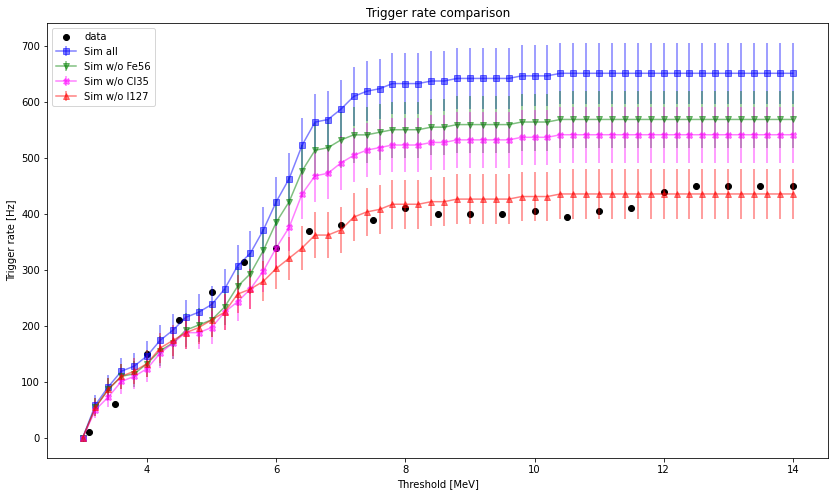

In [30]:
fig = plt.figure(figsize=(14.0,8.0))

plt.errorbar(trigger_rate_inclusive[:,0], trigger_rate_inclusive[:,1], yerr=trigger_rate_inclusive[:,2], marker='s', color='blue', alpha=0.5, label='Sim all')
plt.errorbar(trigger_rate_sansFe56[:,0], trigger_rate_sansFe56[:,1], yerr=trigger_rate_sansFe56[:,2], marker='v', color='green', alpha=0.5, label='Sim w/o Fe56')
plt.errorbar(trigger_rate_sansCl35[:,0], trigger_rate_sansCl35[:,1], yerr=trigger_rate_sansCl35[:,2], marker='X', color='magenta', alpha=0.5, label='Sim w/o Cl35')
plt.errorbar(trigger_rate_sansI127[:,0], trigger_rate_sansI127[:,1], yerr=trigger_rate_sansI127[:,2], marker='^', color='red', alpha=0.5, label='Sim w/o I127')

# plt.scatter(trigger_rate_inclusive[:,0], trigger_rate_inclusive[:,1], marker='s', color='blue', alpha=0.5, label='Sim all')
# plt.scatter(trigger_rate_sansFe56[:,0], trigger_rate_sansFe56[:,1], marker='v', color='green', alpha=0.5, label='Sim w/o Fe56')
# plt.scatter(trigger_rate_sansCl35[:,0], trigger_rate_sansCl35[:,1], marker='X', color='magenta', alpha=0.5, label='Sim w/o Cl35')
# plt.scatter(trigger_rate_sansI127[:,0], trigger_rate_sansI127[:,1], marker='^', color='red', alpha=0.5, label='Sim w/o I127')
plt.scatter(data_rate[:,0], data_rate[:,1], color='black', label='data')

plt.xlabel('Threshold [MeV]')
plt.ylabel('Trigger rate [Hz]')

plt.legend()

plt.title("Trigger rate comparison")
plt.show()

In [ ]:
def calculate_trigger_isotope(pid):
    
    triggered_events = 0
    thresholds = [i for i in np.arange(3,14.2,0.2)]
    triggered_list = {}
    trig_event_list = np.zeros(56)
    skipped_events = 0
    for threshold in thresholds:
        triggered_list['%0.1f'%(threshold)] = 0



    for i in range(len(k100)):

        if(k100.iloc[i].nCapType != pid):
            skipped_events += 1
            continue
        temp_trigger = np.zeros(56)
        temp_veto = np.zeros(56)
        for energy in k100.tile_energy.iloc[i]:
            veto = False
            trigger = False

            for j,threshold in enumerate(thresholds):
                if(energy > threshold):
                    temp_veto[j] = True
                elif(energy > 3.0):
                    temp_trigger[j] = True

        for j in range(56):
            if(not temp_veto[j] and temp_trigger[j]):
                triggered_list['%0.1f'%(thresholds[j])] += 1
            #triggered_events += 1
    #         print('%d : %f'%(i,energy))
    #         break

#     print('Total trigger events = %d'%(triggered_list['3.0']))
#     print('Total trigger rate = %f Hz'%(triggered_list['3.0']/0.218))
    print('Skipped events = ',skipped_events)
    livetime = (events_in_this_sim - skipped_events) * (21.8/50e6)
    print ('Full livetime = %0.4f sec'%(events_in_this_sim*((21.8/50e6))))
    print ('After removal livetime = %0.4f sec'%(livetime))
    x = np.zeros(56)
    y = np.zeros(56)
    for i,j in enumerate(triggered_list.keys()):
        x[i] = float(j)
        y[i] = (triggered_list[j])/livetime
    return np.c_[x,y]

In [ ]:
trigger_rate_onlyI127 = calculate_trigger_isotope(531280)
trigger_rate_onlyCl35 = calculate_trigger_isotope(170360)
trigger_rate_onlyFe56 = calculate_trigger_isotope(260570)

trigger_rate_sansCl35